In [1]:
if (!requireNamespace("readr", quietly = TRUE)) {
  install.packages("readr")
}

# Load the package after installation
library(readr)


# Load the CSV file into a data frame
diamonds_data <- read_csv("/content/diamonds4.csv")

head(diamonds_data)

Rows: 1214 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): clarity, color, cut
dbl (2): carat, price

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


carat,clarity,color,cut,price
<dbl>,<chr>,<chr>,<chr>,<dbl>
0.51,SI2,I,Very Good,774
0.93,IF,H,Ideal,6246
0.50,VVS2,D,Very Good,1146
0.30,VS1,F,Ideal,538
0.31,SI1,F,Ideal,502
1.00,VS1,F,Ideal,7046


In [2]:
# Check for any null (NA) values in the entire dataset
sum(is.na(diamonds_data))

[1] 0

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


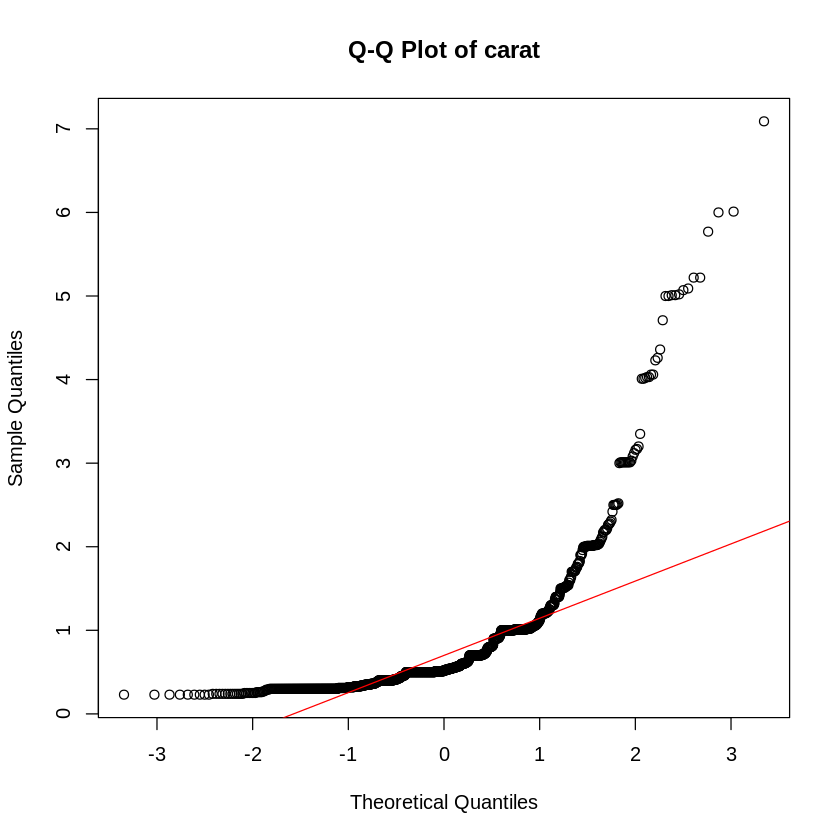

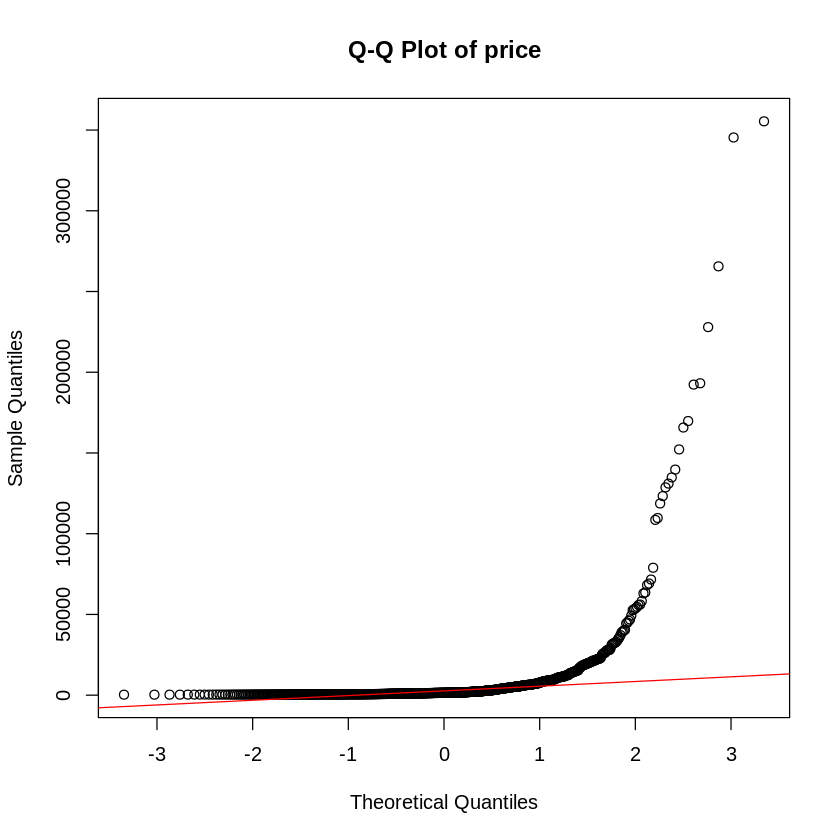

In [3]:
# Load necessary library for visualizations
library(ggplot2)

# Function to plot histogram and Q-Q plot
check_normality <- function(column_name) {
  # Plot Histogram
  ggplot(diamonds_data, aes_string(x = column_name)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue", color = "black") +
    geom_density(color = "red") +
    labs(title = paste("Histogram of", column_name),
         x = column_name,
         y = "Density") +
    theme_minimal()

  # Q-Q Plot
  qqnorm(diamonds_data[[column_name]], main = paste("Q-Q Plot of", column_name))
  qqline(diamonds_data[[column_name]], col = "red")
}

# Check normality for numeric variables
check_normality("carat")
check_normality("price")


In [4]:
# Shapiro-Wilk test for normality
shapiro_test <- function(column_name) {
  test_result <- shapiro.test(diamonds_data[[column_name]])
  print(paste("Shapiro-Wilk test for", column_name, ":"))
  print(test_result)
}

# Run the test for numeric variables
shapiro_test("carat")
shapiro_test("price")


[1] "Shapiro-Wilk test for carat :"

	Shapiro-Wilk normality test

data:  diamonds_data[[column_name]]
W = 0.62205, p-value < 2.2e-16

[1] "Shapiro-Wilk test for price :"

	Shapiro-Wilk normality test

data:  diamonds_data[[column_name]]
W = 0.25147, p-value < 2.2e-16



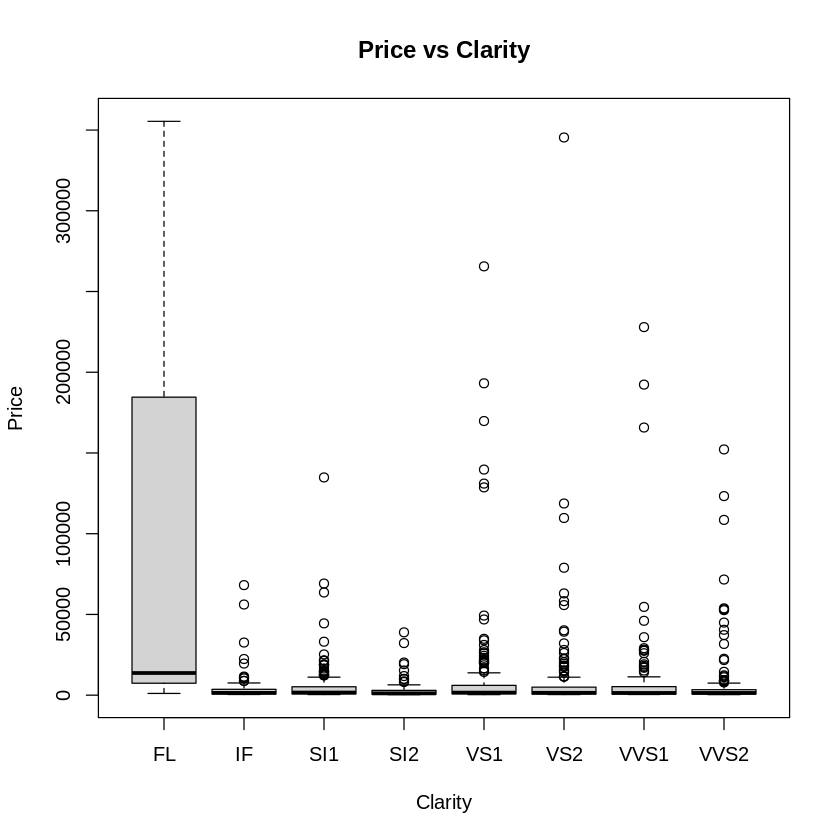

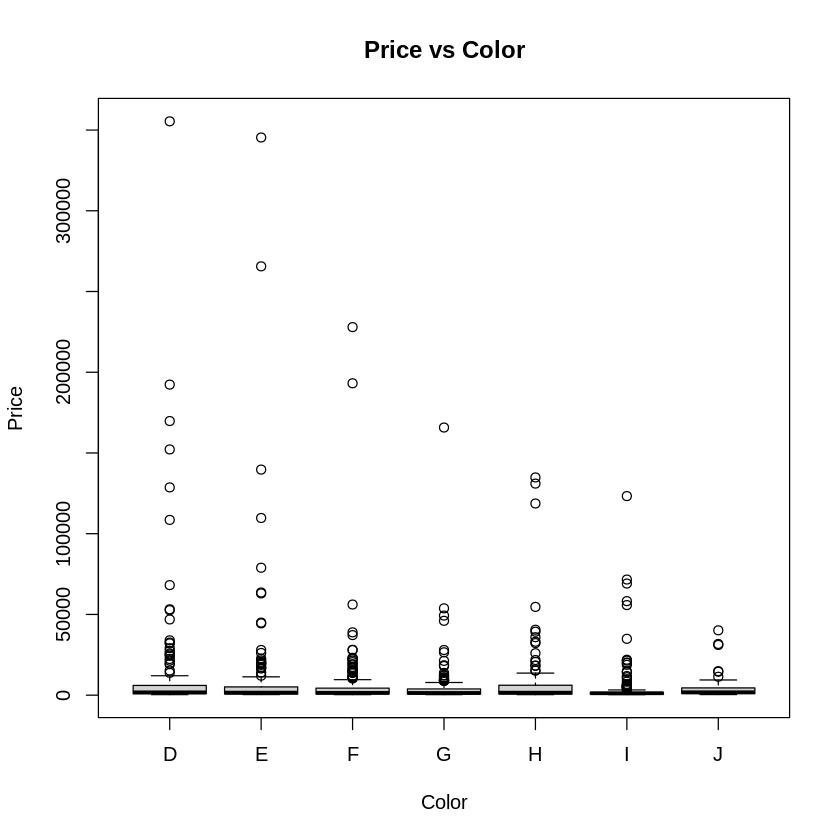

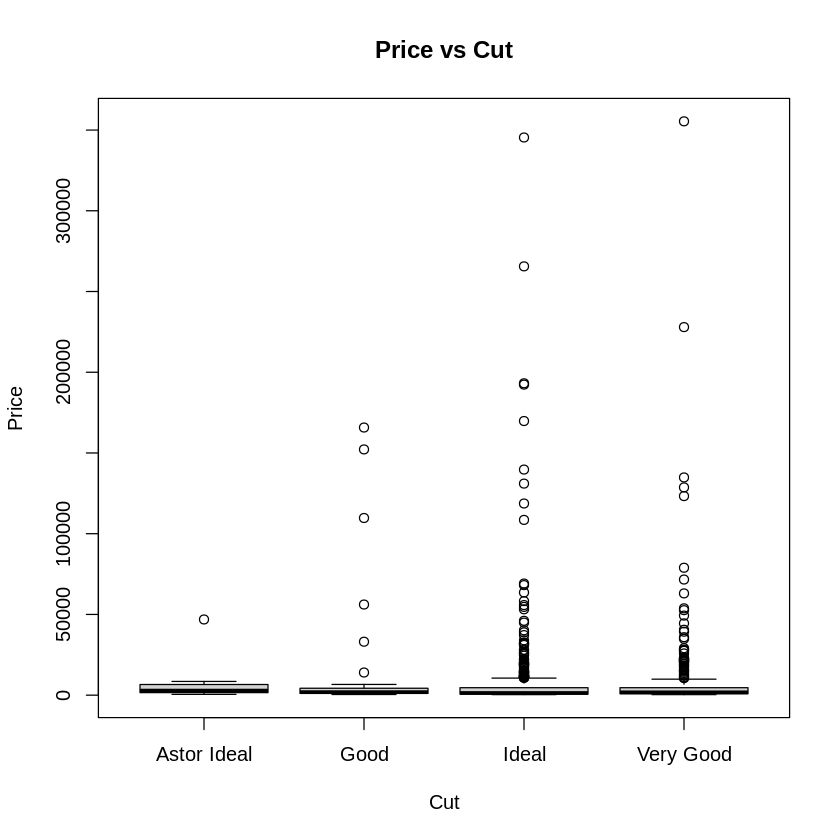

In [5]:
# Boxplot for Price vs Clarity
boxplot(price ~ clarity, data = diamonds_data,
        main = "Price vs Clarity",
        xlab = "Clarity",
        ylab = "Price")

# Boxplot for Price vs Color
boxplot(price ~ color, data = diamonds_data,
        main = "Price vs Color",
        xlab = "Color",
        ylab = "Price")

# Boxplot for Price vs Cut
boxplot(price ~ cut, data = diamonds_data,
        main = "Price vs Cut",
        xlab = "Cut",
        ylab = "Price")


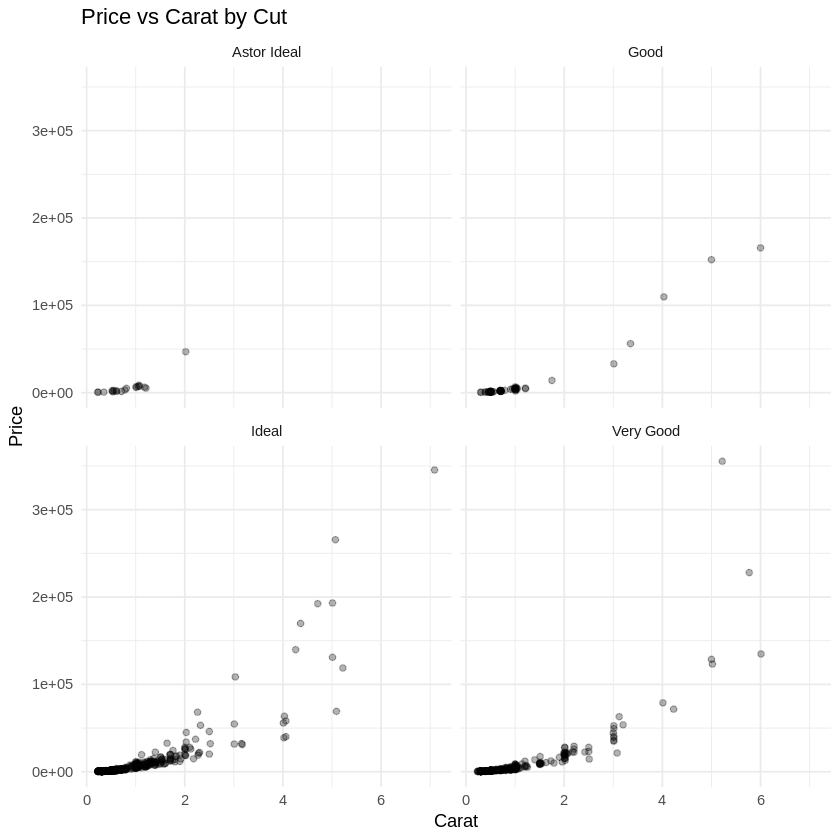

In [6]:
library(ggplot2)

# Facet Grid of Price vs Carat by Cut
ggplot(diamonds_data, aes(x = carat, y = price)) +
  geom_point(alpha = 0.3) +
  facet_wrap(~ cut) +
  labs(title = "Price vs Carat by Cut",
       x = "Carat",
       y = "Price") +
  theme_minimal()


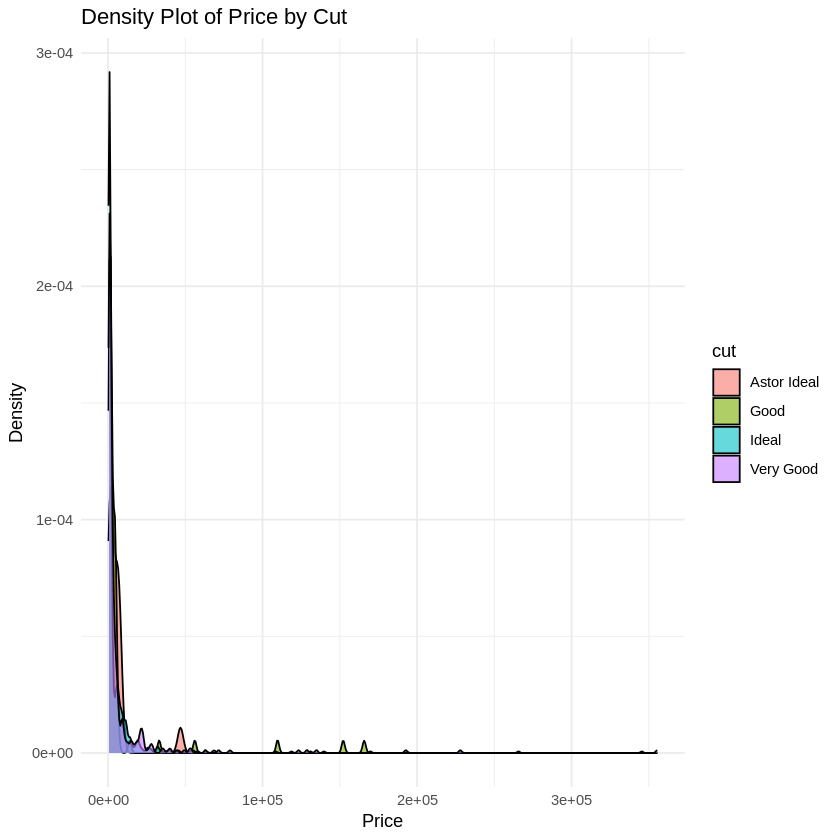

In [7]:
# Density Plot of Price by Cut
ggplot(diamonds_data, aes(x = price, fill = cut)) +
  geom_density(alpha = 0.6) +
  labs(title = "Density Plot of Price by Cut",
       x = "Price",
       y = "Density") +
  theme_minimal()


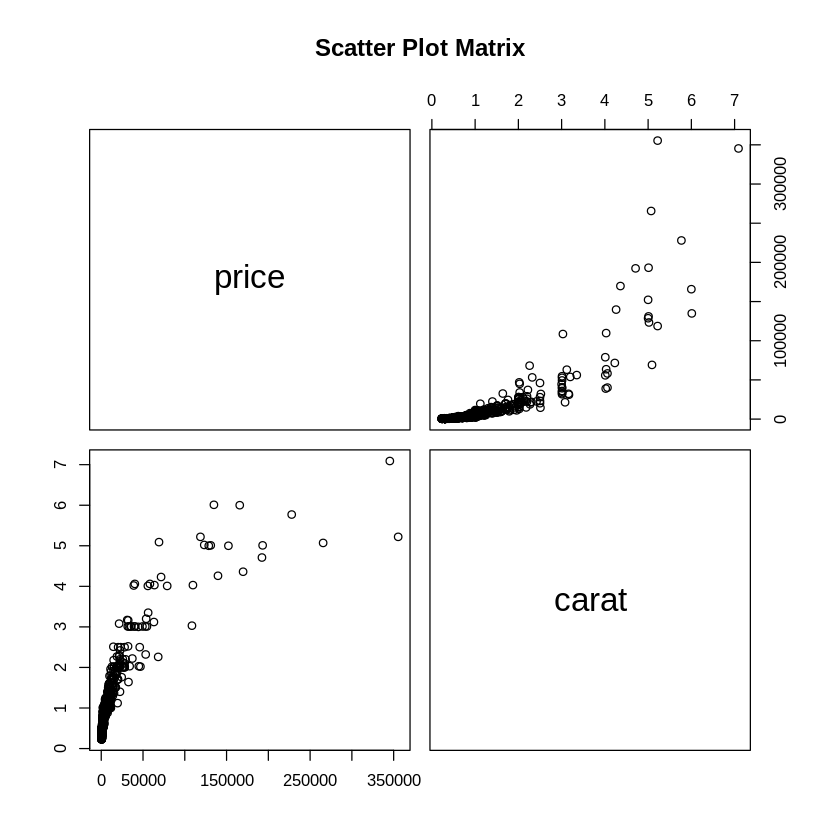

In [8]:
# Scatter Plot Matrix for Carat and Price
pairs(~ price + carat, data = diamonds_data,
      main = "Scatter Plot Matrix")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




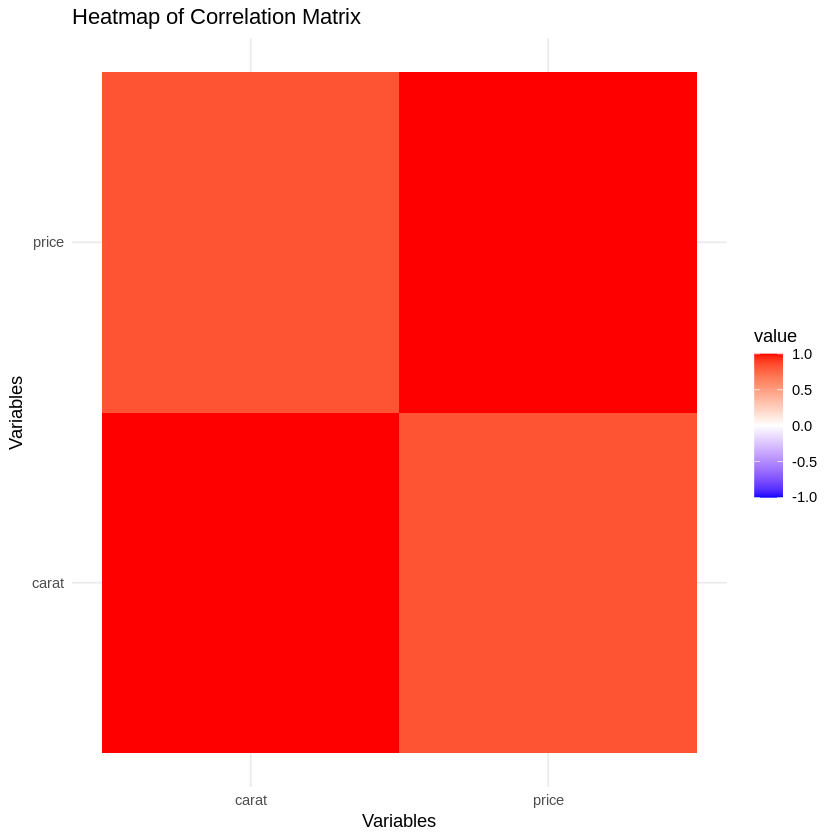

In [9]:
install.packages("reshape2")

library(reshape2)

# Create a correlation matrix
cor_matrix <- cor(diamonds_data[, sapply(diamonds_data, is.numeric)], use = "complete.obs")

# Melt the correlation matrix into long format
melted_cor_matrix <- melt(cor_matrix)

# Plot the heatmap
ggplot(data = melted_cor_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1)) +
  theme_minimal() +
  labs(title = "Heatmap of Correlation Matrix", x = "Variables", y = "Variables")


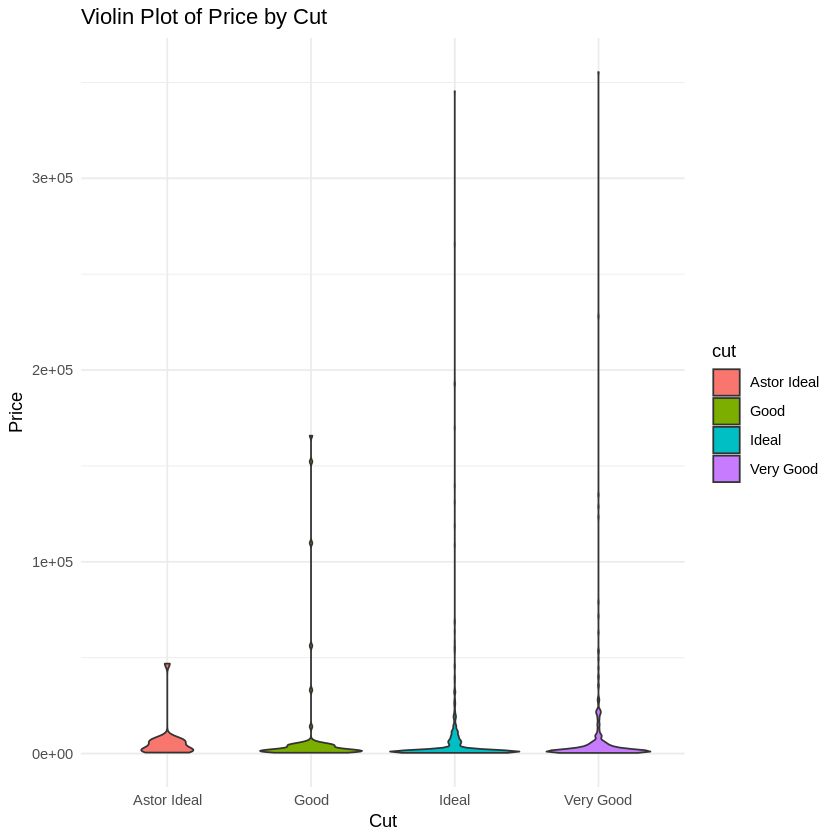

In [10]:
# Violin Plot of Price by Cut
ggplot(diamonds_data, aes(x = cut, y = price, fill = cut)) +
  geom_violin() +
  labs(title = "Violin Plot of Price by Cut",
       x = "Cut",
       y = "Price") +
  theme_minimal()


In [11]:
# Fit a simple linear regression model: price ~ carat
simple_lm <- lm(price ~ carat, data = diamonds_data)

# View the summary of the model
summary(simple_lm)



Call:
lm(formula = price ~ carat, data = diamonds_data)

Residuals:
   Min     1Q Median     3Q    Max 
-49375  -5048   1867   4965 236711 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -13550.9      559.7  -24.21   <2e-16 ***
carat        25333.9      494.4   51.24   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13560 on 1212 degrees of freedom
Multiple R-squared:  0.6842,	Adjusted R-squared:  0.6839 
F-statistic:  2625 on 1 and 1212 DF,  p-value: < 2.2e-16


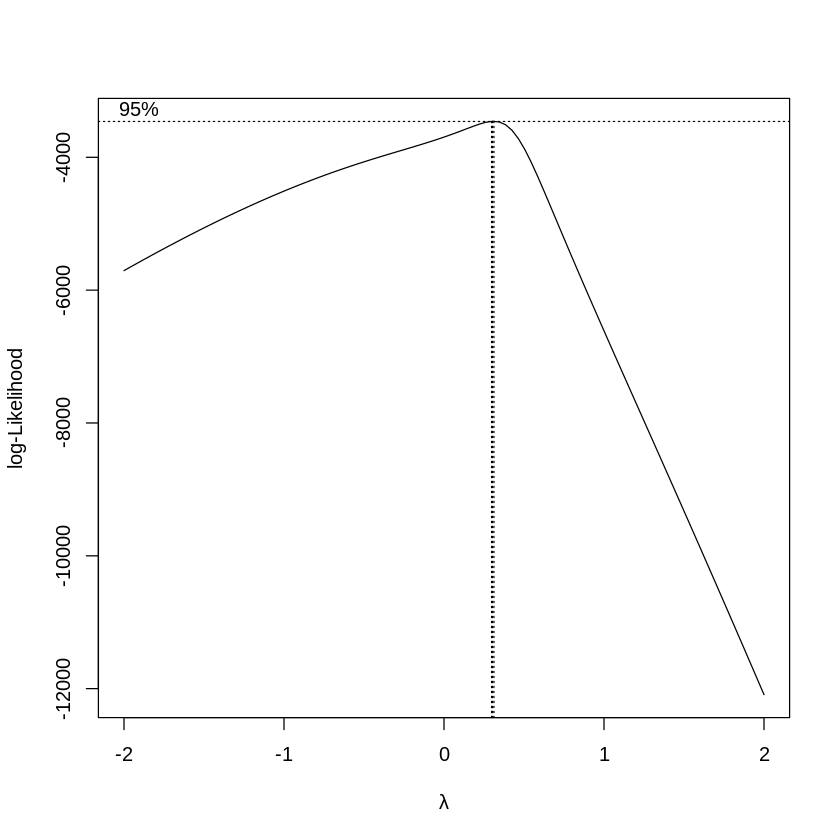

In [19]:
# Load the required libraries
library(MASS)  # For boxcox function

# Fit a simple linear regression model: price ~ carat
simple_lm <- lm(price ~ carat, data = diamonds_data)

# Generate the Box-Cox transformation plot
boxcox_result <- boxcox(simple_lm, plotit = TRUE)

# Find the optimal lambda (the value that maximizes the log-likelihood)
lambda_optimal <- boxcox_result$x[which.max(boxcox_result$y)]

In [20]:
# Display the optimal lambda
lambda_optimal

[1] 0.3030303

In [21]:
# Apply the Box-Cox transformation to the response variable (price) with lambda = 0.303
diamonds_data$transformed_price <- (diamonds_data$price^0.303 - 1) / 0.303

# Refit the linear model with the transformed response variable
transformed_lm <- lm(transformed_price ~ carat, data = diamonds_data)

# Summary of the transformed model
summary(transformed_lm)



Call:
lm(formula = transformed_price ~ carat, data = diamonds_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.439  -2.593  -0.722   1.793  27.525 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.7557     0.2059   71.67   <2e-16 ***
carat        22.3946     0.1819  123.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.989 on 1212 degrees of freedom
Multiple R-squared:  0.926,	Adjusted R-squared:  0.9259 
F-statistic: 1.516e+04 on 1 and 1212 DF,  p-value: < 2.2e-16


In [22]:
# Breusch-Pagan test for boxcox-derived tranformation model
boxcox_bptest <- bptest(transformed_lm)
print("Breusch-Pagan Test for boxcox-derived tranformation Model:")
print(boxcox_bptest)

[1] "Breusch-Pagan Test for boxcox-derived tranformation Model:"

	studentized Breusch-Pagan test

data:  transformed_lm
BP = 402.41, df = 1, p-value < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


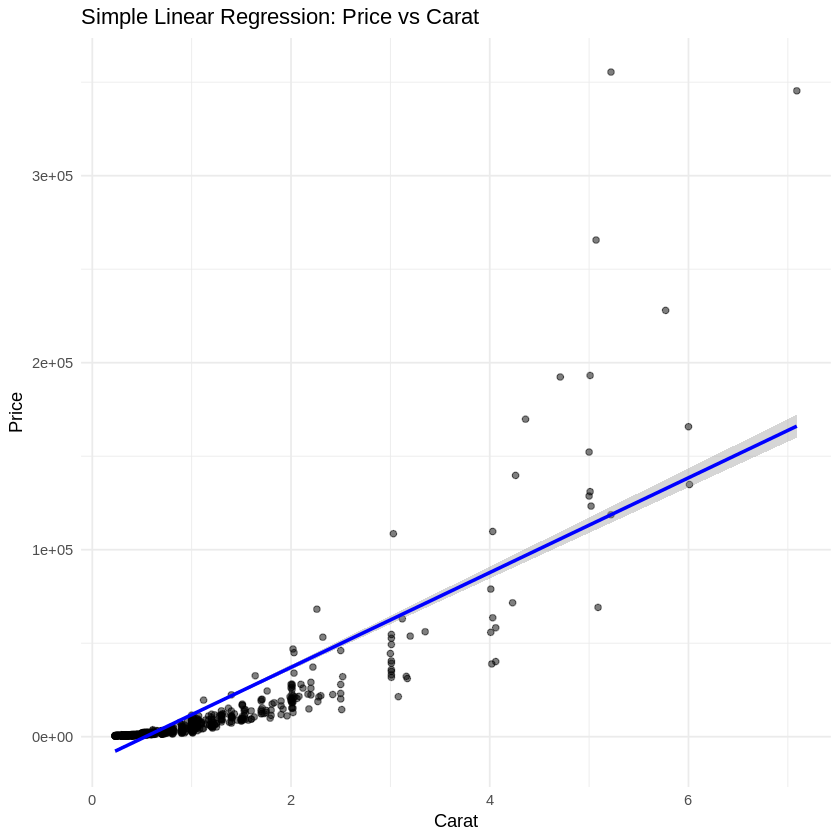

In [13]:
# Scatter plot with regression line
ggplot(diamonds_data, aes(x = carat, y = price)) +
  geom_point(alpha = 0.5) +  # Scatter plot of data points
  geom_smooth(method = "lm", col = "blue") +  # Add the regression line
  labs(title = "Simple Linear Regression: Price vs Carat",
       x = "Carat",
       y = "Price") +
  theme_minimal()


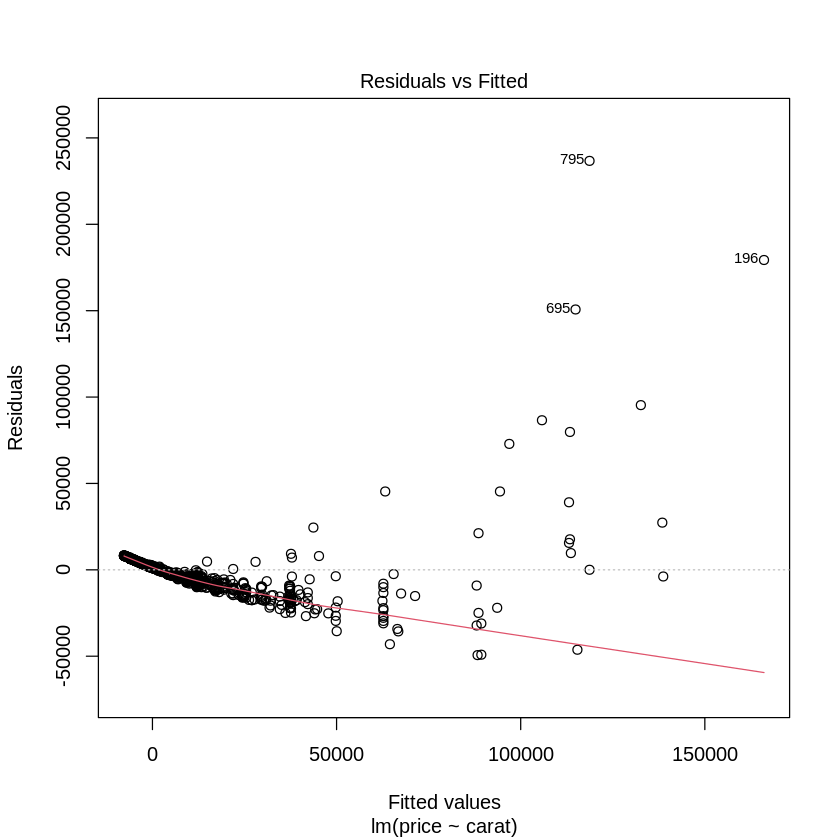

In [14]:
# Residuals vs Fitted Plot
plot(simple_lm, which = 1)


In [15]:
# Check if lmtest is installed, and if not, install it
if (!require(lmtest)) {
  install.packages("lmtest")
  library(lmtest)
} else {
  library(lmtest)
}


# Load the lmtest library
library(lmtest)

# Perform the Breusch-Pagan test
bptest(simple_lm)


Loading required package: lmtest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘lmtest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  simple_lm
BP = 198.95, df = 1, p-value < 2.2e-16


In [16]:
# Log transformation of price ~ carat
log_model <- lm(log(price) ~ carat, data = diamonds_data)

# Breusch-Pagan test for log-transformed model
log_bptest <- bptest(log_model)
print("Breusch-Pagan Test for Log-Transformed Model:")
print(log_bptest)

# Log transformation for both price and carat
log_both_model <- lm(log(price) ~ log(carat), data = diamonds_data)

# Breusch-Pagan test for log-log model
log_both_bptest <- bptest(log_both_model)
print("Breusch-Pagan Test for Log-Log Model:")
print(log_both_bptest)

# Square root transformation of carat with original price
sqrt_model <- lm(price ~ sqrt(carat), data = diamonds_data)

# Breusch-Pagan test for square root-transformed model
sqrt_bptest <- bptest(sqrt_model)
print("Breusch-Pagan Test for Square Root-Transformed Model:")
print(sqrt_bptest)


[1] "Breusch-Pagan Test for Log-Transformed Model:"

	studentized Breusch-Pagan test

data:  log_model
BP = 429.06, df = 1, p-value < 2.2e-16

[1] "Breusch-Pagan Test for Log-Log Model:"

	studentized Breusch-Pagan test

data:  log_both_model
BP = 41.169, df = 1, p-value = 1.396e-10

[1] "Breusch-Pagan Test for Square Root-Transformed Model:"

	studentized Breusch-Pagan test

data:  sqrt_model
BP = 137.7, df = 1, p-value < 2.2e-16



In [17]:
# Fit a polynomial regression model (e.g., quadratic)
poly_model <- lm(price ~ poly(carat, 2), data = diamonds_data)

# Breusch-Pagan test for polynomial model
poly_bptest <- bptest(poly_model)
print("Breusch-Pagan Test for Polynomial Model:")
print(poly_bptest)


[1] "Breusch-Pagan Test for Polynomial Model:"

	studentized Breusch-Pagan test

data:  poly_model
BP = 260.88, df = 2, p-value < 2.2e-16



In [18]:
# Compute the weights using the inverse of the fitted values squared
weights <- 1 / fitted(simple_lm)^2

# Fit the WLS model
wls_model <- lm(price ~ carat, data = diamonds_data, weights = weights)

# Perform the Breusch-Pagan test on the WLS model
wls_bptest <- bptest(wls_model)
print("Breusch-Pagan Test for WLS Model:")
print(wls_bptest)


[1] "Breusch-Pagan Test for WLS Model:"

	studentized Breusch-Pagan test

data:  wls_model
BP = 8.1754e-10, df = 1, p-value = 1

